# 应用：构建DNN分类图片 #
利用之前实现的函数构建一个DNN，实现监督学习

## 数据集 #
assignment 2 的cat/noncat数据集

## 调用的库 #
- PIL和Scipy：用于用自己的图片数据测试最后的模型(待更) 
- dnn_app_utils：提供assignment 4中所实现的函数

In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from depends.dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [12]:
train_y.shape

(1, 209)

## 查看图片 #
更改index，可以查看训练集中的各图片

第 0 张图片:   这是一张  non-cat  图片


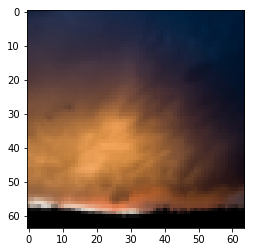

In [17]:
index = 0
plt.imshow(train_x_orig[index])
print("第 %d 张图片: " %index, " 这是一张 ", classes[train_y[0, index]].decode("utf-8"), " 图片")

In [19]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("训练样本量: " + str(m_train))
print ("测试样本量: " + str(m_test))
print ("图片尺寸: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集shape: " + str(train_x_orig.shape))
print ("训练集label的shape: " + str(train_y.shape))
print ("测试集shape: " + str(test_x_orig.shape))
print ("测试集label的shape: " + str(test_y.shape))

训练样本量: 209
测试样本量: 50
图片尺寸: (64, 64, 3)
训练集shape: (209, 64, 64, 3)
训练集label的shape: (1, 209)
测试集shape: (50, 64, 64, 3)
测试集label的shape: (1, 50)


## 对数据进行预处理 #
- 将图片矩阵转变为向量
- 将图片的像素进行归一化

In [28]:
train_x = train_x_orig.reshape(m_train, -1).T
test_x = test_x_orig.reshape(m_test, -1).T
train_x = train_x / 255
test_x = test_x / 255

## 搭建模型 #
- 搭建一个两层神经网络
- 搭建一个L层神经网络

**搭建网络步骤：**  
1.初始化权重/定义超参数  
2.做循环：    
　(1)前向传播  
　(2)计算代价函数  
　(3)反向传播  
　(4)更新权重 
3.预测

## 两层神经网络 #
设每层共有7个神经元  
由于是二分类，输出只有一个值  

In [29]:
n_x = 12288     
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [32]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x = n_x, n_h = n_h, n_y = n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):

        A1, cache1 = linear_activation_forward(A_prev = X, W = W1, b = b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A_prev = A1, W = W2, b = b2, activation = "sigmoid")

        cost = compute_cost(AL = A2, Y = Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        dA1, dW2, db2 = linear_activation_backward(dA = dA2, cache = cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA = dA1, cache = cache1, activation = "relu")

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters = update_parameters(parameters = parameters, grads = grads, learning_rate = learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614843
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978097092
Cost after iteration 1700: 0.113065245621647
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.0834261795972687
Cost after iteration 2000: 0.07439078704319085
Cost after iteration 2100: 0.066307481322

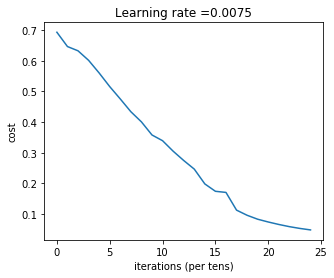

In [33]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost = True)

In [34]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [35]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


## L层神经网络 #
设L = 4，首先要定义每一层的神经元数量

In [36]:
layers_dims = [12288, 20, 7, 5, 1]

In [37]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                       

    parameters = initialize_parameters_deep(layer_dims = layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(parameters = parameters, X = X)

        cost = compute_cost(AL = AL, Y = Y)

        grads = L_model_backward(AL = AL, caches = caches, Y = Y)

        parameters = update_parameters(parameters = parameters, grads = grads, learning_rate = learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


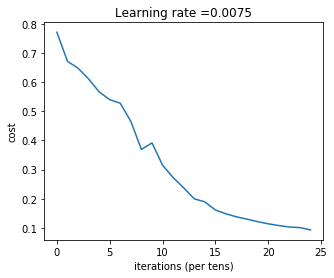

In [38]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [39]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.985645933014


In [40]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


可以看到更深层的神经网络在测试集上取得了更好的表现